# Load libraries

In [19]:
# Import libraries and modules
import numpy as np
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import tensorflow as tf
import os
import warnings

# For reproducibility
np.random.seed(42)
warnings.filterwarnings('ignore')

# Setup

We are going to use MobilenetV2 finetuned version for image detection using webcam 

In [20]:
# Recreate VGG Model
MobileNet = tf.keras.models.load_model('../models/unfrozen_mobilenet_finetuned.h5', compile = False)

In [22]:
train_list = pd.read_csv('../logs/checkpoint/train_list.csv')
# generate list of classes for reference 
classes = train_list['class_name'].unique().tolist()
print(f'Number of classes: {len(classes)}')

Number of classes: 22


In [23]:
classes

['Baby_Chyesim',
 'Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Celery',
 'Coriander',
 'Cucumber',
 'Daun_Sup',
 'Kailan',
 'Kangkong',
 'Parsley',
 'Potato',
 'Pumpkin',
 'Radish',
 'Sharp_Spinach',
 'Tomato']

In [24]:
# Defining a function to return the image filepath with a new filename.
# If input filepath is "../data/dataset/test/baby_kailan_unseen.jpg", output will be "../data/dataset/test/baby_kailan_unseen_identified.jpg"

def new_img_name(org_img_path):
    # split to get only contents with jpg string attached 
    # example: [ '../data/dataset/test', 'baby_kailan_unseen.jpg'] 
    img_path, img_name_ext = os.path.split(org_img_path)

    # obtain split to get only image name
    # example: ['baby_kailan_unseen', '.jpg']
    img_name, img_ext = os.path.splitext(img_name_ext)

    # Combine string for new directory
    new_img_name_ext = img_name+"_identified"+img_ext
    new_img_path = os.path.join(img_path, new_img_name_ext)

    return new_img_path

In [25]:
# This function mainly 
# 1) Takes the frame in numpy array, convert to image and preprocessing
# 2) Generate top 3 prediction based on on chosen model. output will be predicted class and its normalized prediction percentage by non-linear Softmax function
# 3) Places text in the top right of the frame  

def classify_vege(frame):

        #Convert the captured frame into RGB
        imageRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        im = Image.fromarray(imageRGB)

        #Resizing into dimensions you used while training
        im = im.resize((224,224))
        img_array = np.array(im) / 255

        #Expand dimensions to match the 4D Tensor shape.
        img_array = np.expand_dims(img_array, axis=0)

        # Defining font, scales and thickness.
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        text_scale = 0.5

        # Create text based on top 3 predictions based on model picked: MobileNet
        # Output will show predicted class and the normalized prediction percentage by softmax 
        text = f'Top Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-1]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-1]*100,2)}%'
        text2 = f'2nd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-2]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-2]*100,2)}%'
        text3 = f'3rd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-3]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-3]*100,2)}%'

        # Place text on video based on org (top side)
        vege_text_1 = cv.putText(frame, text, org=(0,30), fontFace=fontFace , fontScale=text_scale, thickness=2, color=(0, 0 , 0), lineType=cv.LINE_AA)
        vege_text_2 = cv.putText(frame, text2, org=(0,60), fontFace=fontFace , fontScale=text_scale, thickness=2, color=(0, 0 , 0), lineType=cv.LINE_AA)
        vege_text_3 = cv.putText(frame, text3, org=(0,90), fontFace=fontFace , fontScale=text_scale, thickness=2, color=(0, 0 , 0), lineType=cv.LINE_AA)

        return frame

In [26]:
# This function is created to plot image using input directory

def plot_image(dir):
    # reads colour image using OpenCV as a NumpyArray with row x column x color (3)
    # order of color is BGR (blue, green, red)
    img_arr=cv.imread(dir)

    # Need to convert to RGB else color is distorted 
    img_arr = cv.cvtColor(img_arr, cv.COLOR_BGR2RGB)

    # Show picture 
    plt.imshow(img_arr)

    # remove axis (default)
    plt.axis('off')
    plt.show()

In [27]:
# This function mainly 
# 1) Takes the frame in numpy array, convert to image and preprocessing
# 2) Generate top 3 prediction based on on chosen model. output will be predicted class and its normalized prediction percentage by non-linear Softmax function
# 3) Places text in the center bottom of the frame  
# 4) Returns string of top predicted class, ie. 'Kailan' if unseen data detected is Kailan 

def classify_vege_centered(frame):

        #Convert the captured frame into RGB
        imageRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        im = Image.fromarray(imageRGB)

        #Resizing into dimensions you used while training
        im = im.resize((224,224))
        img_array = np.array(im) / 255

        #Expand dimensions to match the 4D Tensor shape.
        img_array = np.expand_dims(img_array, axis=0)

        # Defining font, scales, thickness and color.
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        text_scale = 0.8
        colour = (0,0,255)

        # Create text based on top 3 predictions based on model picked: MobileNet
        # Output will show predicted class and the normalized prediction percentage by softmax 
        text = f'Top Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-1]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-1]*100,2)}%'
        text2 = f'2nd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-2]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-2]*100,2)}%'
        text3 = f'3rd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-3]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-3]*100,2)}%'

        # Place text on video based on org (centered)
        vege_text_1 = cv.putText(frame, text, org=(900,900), fontFace=fontFace , fontScale=text_scale, thickness=2, color=colour, lineType=cv.LINE_AA)
        vege_text_2 = cv.putText(frame, text2, org=(900,950), fontFace=fontFace , fontScale=text_scale, thickness=2, color=colour, lineType=cv.LINE_AA)
        vege_text_3 = cv.putText(frame, text3, org=(900,1000), fontFace=fontFace , fontScale=text_scale, thickness=2, color=colour, lineType=cv.LINE_AA)

        # generate name generated from class list
        # Only showing top prediction for reference.  
        top = str(classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-1]]).lower()
        
        return frame,top
        

In [28]:
# Test output for function 
dir_kailan = '../sample_test/Kailan2.jpg'
img_arr=cv.imread(dir_kailan)

# To get Top prediction class based on ModelNetV2 
frame, top = classify_vege_centered(img_arr)
print(top)

kailan


MobileNetV2 is able to identify unseen data Kailan effectively. 

In [29]:
# Load in reference list for identified as top prediction
unique_vege_list = pd.read_csv('../logs/checkpoint/unique_vegetable_list.csv')[['Name','dir']]

In [30]:
# Show top 5 headers of this list 
unique_vege_list.head(5)

,Name,dir
0,baby_chyesim,../data/unique_images\baby_chyesim.JPG
1,bean,../data/unique_images\beans.jpg
2,bitter_gourd,../data/unique_images\bitter_gourd.jpg
3,bottle_gourd,../data/unique_images\bottle_gourd.jpg
4,brinjal,../data/unique_images\brinjal.jpg


In [31]:
# get image array from vegetables listed in unique vege list
def get_ImageArray(name):
    # get directory to top predicted image 
    directory = unique_vege_list[unique_vege_list['Name'] == name].dir.values[0]
    # get image array out using Opencv
    img_arr=cv.imread(directory)
    img_arr=cv.resize(img_arr, (224,224))
    return img_arr

## Vegetable classifier on Image

This method involves uploading an image, output expected will be its prediction included on the top right corner

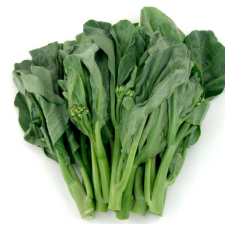

In [32]:
# Provide the image filepath as a string below.
my_image = "../sample_test/Kailan2.jpg"

# Showing picture of chyesim Unseen
plot_image(my_image)

Saved to ../sample_test\Kailan2_identified.jpg


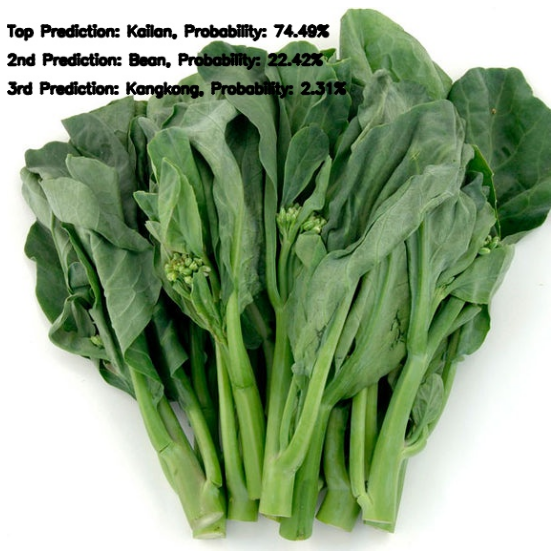

In [33]:
# Reading the image from filepath provided above
img = cv.imread(my_image)

# Classify image using MobileNet
vege_img = classify_vege(img)

# Saving the new generated image with a new name at the same location. 
try:
    new_my_image = new_img_name(my_image)
    cv.imwrite(new_my_image, vege_img)
    print(f"Saved to {new_my_image}")
except:
    print("Error: Could not save image!")

# plot saved image 
plt.figure(figsize=(10,10))
plot_image(new_my_image)

# Vegetable Classifier on Video


We will be using live webcam video

Includes 
1) Top three predictions 
2) Top predicted image (reference picture)

In [34]:
# instantiate videocapture 
cap = cv.VideoCapture(0)

# check operational 
if not cap.isOpened():
    print("Cannot open camera.")
else:
    print("Camera is operational.")

# to set resolution and fps 
ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,1920)
ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,1080)
ret = cap.set(cv.CAP_PROP_FPS,10)

# to attain variables for fps, width and height
fps = cap.get(cv.CAP_PROP_FPS)
width  = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)  # float

print(fps, width, height)

Camera is operational.
10.0 1920.0 1080.0


In [35]:
# setting format for mp4v
fourcc = cv.VideoWriter_fourcc('m', 'p', '4', 'v')

# videowriter to save video into video folder 
out = cv.VideoWriter('../video/output.avi', fourcc, fps, (int(width), int(height)))

while True:
        # read in each frame from the webcam 
        # _ is for return: typically should return True if video capturing frame, else will return None
        # Frame is an image array vector captured
        _, frame = cap.read()

        # To classify and label in video live, and get top prediction string 
        vege_img, top = classify_vege_centered(frame)

        # get image array for top prediction image 
        top_image = get_ImageArray(top)

        # positioning overlay image for Top prediction
        frame_h, frame_w, frame_c = frame.shape
        overlay = np.zeros((frame_h, frame_w, 3), dtype = 'uint8')
        top_image_h, top_image_w, top_image_c = top_image.shape
        for i in range(0, top_image_h):
                for j in range(0, top_image_w):
                                # add position so that picture is centered
                                overlay[i + 800, j + 600] = top_image[i,j]


        # Blending in overlay picture with original frame 
        # alpha =1, beta =1, gamma = 0 
        frame2 = cv.addWeighted(overlay, 1,frame, 1, 0)
        
        # Saving frame to output video using the VideoWriter object defined above.
        out.write(frame2)
        
        # show frame 
        cv.imshow("Prediction", frame2)
        
        key=cv.waitKey(1)
        if key == ord('q'):
                break
cv.destroyAllWindows()


In [36]:
cap.release()

out.release()

cv.destroyAllWindows()

# Conclusion and Recommendation/Future-work

Specific only to deployment using `LIVE Video`, this model can deployed and tested on real unseen data. In the meantime, more efforts can be spent on expanding dataset with cleaner pictures perhaps from cloud spaces.

Assuming deployment using Live Video, we can put more effort into expanding the dataset with cleaner pictures from cloud spaces 
- To cater for wrongly classified images or missing classes;
Deploying an option for users to input simple feedback if they don’t think that the top predicted image matches the unseen data
- Video to autosave and used as input file to learn new data by frames
Zoom into classes that has lower defining probabilities between Top and 2nd predictions.  
(50% - Top prediction, 40% - 2nd prediction) 

